In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
link = '../../airbnb/data/venezia/listings_modeling.csv'
data = pd.read_csv(link)

In [9]:
data.head(3)

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,room_type,accommodates,bedrooms,beds,...,amenity_dishes_and_silverware,amenity_hangers,amenity_refrigerator,amenity_kitchen,amenity_microwave,amenity_long_term_stays_allowed,amenity_air_conditioning,name_cleaned_length,description_cleaned_length,name_touristy
0,within_day,0.7,0.87,0,16.0,1,entire_place,4,2.0,4.0,...,0,1,0,1,0,1,1,5,171,1
1,within_day,0.7,0.87,0,16.0,1,entire_place,6,2.0,6.0,...,0,1,0,1,0,1,1,6,164,1
2,within_day,0.7,0.87,0,16.0,1,entire_place,4,2.0,4.0,...,0,1,0,1,0,1,1,6,155,0


## 1. Usual-manual way

In [11]:
def scatter_sns(data, x, y):
    plt.figure(figsize = (9, 5))
    sns.scatterplot(data = data, x = x, y = y, size = 3/4, edgecolor = 'k', linewidth = 1/3, color = 'blue', legend = False)
    plt.title('Relationship between ' + x + ' and ' + y)
    plt.show() 
    
def scatter_hist(data, i):
    plt.figure(figsize = (9, 4))
    sns.distplot(data[i], kde = False, bins = 40,
                 hist_kws = {'edgecolor' : 'black', 'linewidth' : 1, 'color' : 'blue', 'alpha': 1})
    plt.title('Distribution of ' + i)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.show()  
    
BOXPLOT_PROPS = {
    'boxprops':{'edgecolor':'black', 'linewidth' : 1},
    'flierprops':{'markerfacecolor':'black', 'markeredgecolor':'darkgray', 'marker' : 'x'},
    'medianprops':{'color':'black', 'linewidth' : 1},
    'whiskerprops':{'color':'black', 'linewidth' : 1},
    'capprops':{'color':'black', 'linewidth' : 1}
}

def sns_boxplot(data, x, y, xlim = 250):   

    order = data.loc[:,[x, y]].groupby([y]).median().sort_values(x, ascending = False)

    plt.figure(figsize = (10, 5))
    sns.boxplot(data = data, y = y, x = x, color = 'blue', fliersize = 2, 
                **BOXPLOT_PROPS, order = order.index)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.xlim(0, xlim)
    plt.title('Distribution of ' + x + ' with regards to ' + y)
    plt.show()
    
def plot_corr(df, numerics):
    
    fig, ax = plt.subplots(figsize = (15, 7))
    sns.heatmap(df[numerics].corr(), ax = ax, cmap = 'coolwarm', center = 0, 
                annot = True, fmt = '.2g', annot_kws={'size' : 8})
    plt.title('Correlations\n')
    plt.show()

Some distributions

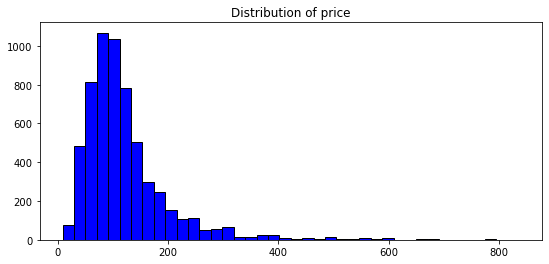

In [14]:
scatter_hist(data, 'price')

Some relationships

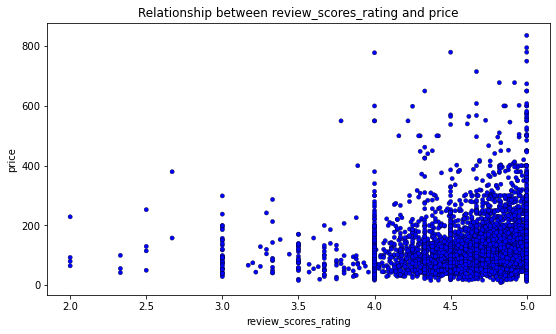

In [17]:
scatter_sns(data, 'review_scores_rating', 'price')

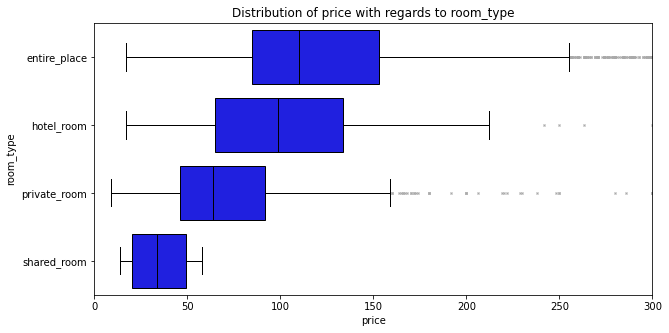

In [20]:
sns_boxplot(data, 'price', 'room_type', 300)

Correlations

In [23]:
amenities = data.filter(like = 'amen').columns.to_list()
all_numerics = data.select_dtypes(exclude = 'O').columns.tolist()
numerics = np.setdiff1d(all_numerics, amenities)

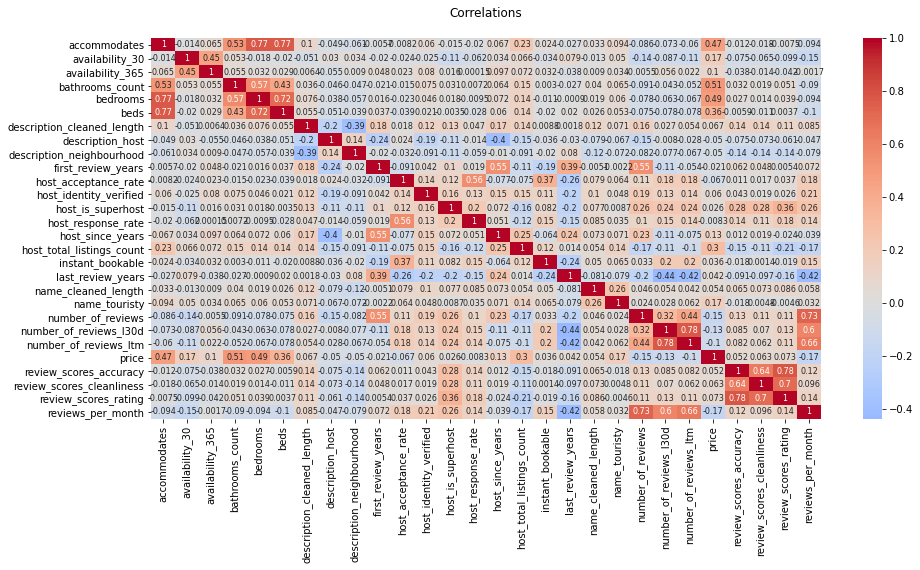

In [27]:
plot_corr(data, numerics)

## 2. ProfileReport from Pandas Profiling

<img src="https://camo.githubusercontent.com/8a45c0936d6113b12b7b32942f448270eda8f714665ba8629f36c291f0ccd5fd/68747470733a2f2f70616e6461732d70726f66696c696e672e6769746875622e696f2f70616e6461732d70726f66696c696e672f646f63732f6173736574732f6c6f676f5f6865616465722e706e67" width="500"/>

In [31]:
from pandas_profiling import ProfileReport

In [62]:
profile = ProfileReport(data, title = 'EDA report on AirBnB Venezia dataset')

In [64]:
%%time
profile.to_file('EDA/PandasProfiling.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Wall time: 209 ms
